$\textbf{Problem Set 2 for PHYS064}$

Problem 1: Use Gram-Schmidt to find an orthonormal set out of $(1,-1,1)$, $(-1,0,1)$, and $(2,-1,2)$. 

In [48]:
function projection(A,B)
# projection of B onto A
    return (A'*B)/(A'*A)*A
end

function GramSchmidt(A,B,C)
# Gram-Schmidt orthogonalization of a set of vectors A, B, and C
    a = A/sqrt(A'*A) # normalize A
    b_0 = B - projection(a,B) # subtract projection of B onto A
    b = b_0/sqrt(b_0'*b_0) # normalize b
    c_0 = C - projection(a,C) - projection(b,C) # subtract projections of A and B onto C
    c = c_0/sqrt(c_0'*c_0) # normalize c
    return a,b,c
end


println(GramSchmidt([1,-1,1],[-1,0,1],[2,-1,2]))


([0.5773502691896258, -0.5773502691896258, 0.5773502691896258], [-0.7071067811865475, 0.0, 0.7071067811865475], [0.4082482904638629, 0.8164965809277261, 0.4082482904638629])


The vectors are graphed below. The original vectors are graphed red and the Gram-Schmidt orthonormalized vectors are grapher in green.

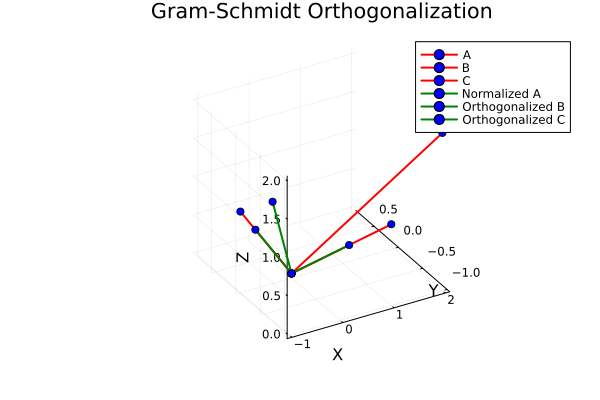

In [49]:
using Plots

# plot the original vectors
plot3d([0, 1], [0, -1], [0, 1], line = (2, :red), marker = (4, 4, :blue), xlabel = "X", ylabel = "Y", zlabel = "Z", title = "Gram-Schmidt Orthogonalization", camera = (-30, 30, 40), label = "A")
plot3d!([0, -1], [0, 0], [0, 1], line = (2, :red), marker = (4, 4, :blue), label = "B")
plot3d!([0, 2], [0, -1], [0, 2], line = (2, :red), marker = (4, 4, :blue), label = "C")

# plot the normalized and orthogonalized vectors
plot3d!([0, 0.5773502691896258], [0, -0.5773502691896258], [0, 0.5773502691896258], line = (2, :green), marker = (4, 4, :blue), label = "Normalized A")
plot3d!([0, -0.7071067811865475], [0, 0], [0, 0.7071067811865475], line = (2, :green), marker = (4, 4, :blue), label = "Orthogonalized B")
plot3d!([0, 0.408248290463863], [0, 0.8164965809277261], [0, 0.408248290463863], line = (2, :green), marker = (4, 4, :blue), label = "Orthogonalized C")

Problem 4: Plot Fourier Series

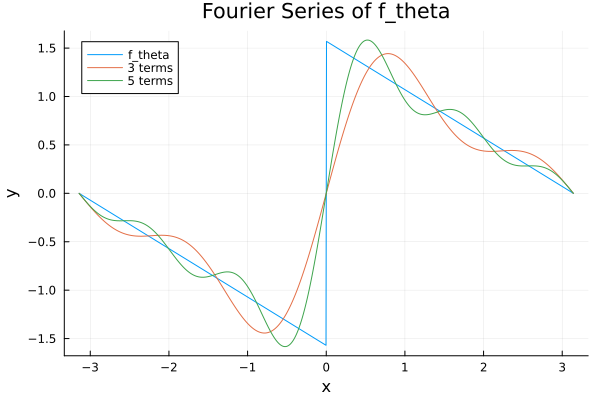

In [50]:
# Problem 4

using Plots

function f_theta_single(x)
    if x.>0
        return 0.5.*(pi.-x)
    else
        return -0.5.*(pi.+x)
    end
end

function f_theta(x)
    value = zeros(length(x))
    for i in 1:length(x)
        value[i] = f_theta_single(x[i])
    end

    return value
end

function fourier_series_single(terms,x)
# Compute the fourier series of f_theta with the first "terms" terms
    sum = 0
    for n in 1:terms
        sum += sin(n*x)/n
    end
    return sum
end

function fourier_series(terms,x)
# Compute the fourier series of f_theta with the first "terms" terms
    value = zeros(length(x))
    for i in 1:length(x)
        value[i] = fourier_series_single(terms,x[i])
    end
    return value
end

# Generate x values
x_values = range(-pi,pi,length=1000)

# Plot the functions
plot(x_values, [f_theta(x_values), fourier_series(3,x_values), fourier_series(5,x_values)], label = ["f_theta" "3 terms" "5 terms"], xlabel = "x", ylabel = "y", title = "Fourier Series of f_theta")

Probelm 5: Verify pi squared to 0.1% accuracy.

In [51]:
# Problem 5 (c)
function verifypi2()

    # Outputs: the value of pi square to 0.1% accuracy

    i = 0
    result = 0
    while abs(result - pi^2) > 0.001*pi^2
        result += 8/((2*i+1)^2)
        i += 1
    end
    
    return (result, i)
end

verifypi2()

(9.859752204263694, 203)

Problem 6: Tridiagonal Matrix

[-6.158428709125134, 0.8277072531849549]


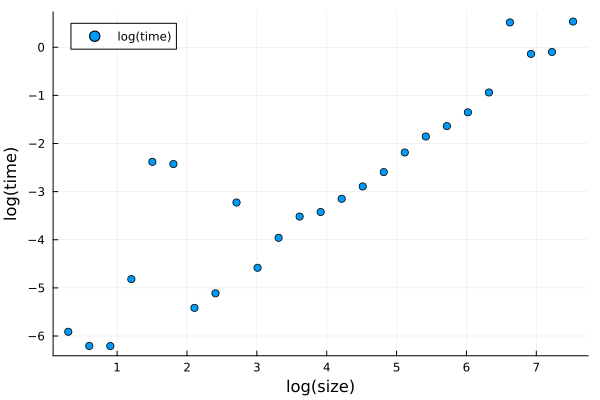

In [47]:
# Problem 6 (a)
function tri(B,b)

    # Inputs
    #
    # B: a tridiagonal matrix given as an array with N rows and three columns. 
    # The first and last entries would necessarily be unused. 
    # b: An N-component array representing the b vector
    #
    # Outputs:
    #
    # x: the solution vector to A x = b
    #
    # You can find the algorithm to implement, known as the Thomas algorithm, below.

    # calculate c'_i
    N = length(b)
    c_prime = zeros(N-1)
    c_prime[1] = B[1,3]/B[1,2]
    for i in 2:N-1
        c_prime[i] = B[i,3]/(B[i,2] - B[i,1]*c_prime[i-1])
    end

    # calculate d'_i
    d_prime = zeros(N)
    d_prime[1] = b[1]/B[1,2]
    for i in 2:N
        d_prime[i] = (b[i] - B[i,1]*d_prime[i-1])/(B[i,2] - B[i,1]*c_prime[i-1])
    end

    # calculate x
    x = zeros(N)
    x[N] = d_prime[N]
    for i in N-1:-1:1
        x[i] = d_prime[i]-c_prime[i]*x[i+1]
    end

    return x
    
end

# test the function
function test_tri_time(order)
# test the time complexity of the tri function
    elapsed_time = zeros(order)
    size = zeros(order)
    for n in 1:order
        N = 2^n
        size[n] = N
        B = zeros(N,3)
        b = ones(N) # create the b vector of 1s
        for i in 0:N-1 # fill in the tridiagonal matrix
            B[i+1,1] = -1
            B[i+1,2] = 1
            B[i+1,3] = 1
        end

        # record the time
        elapsed_time[n] = @elapsed tri(B,b)
    end

    return size, elapsed_time
end

size, elapsed_time = test_tri_time(25)

# plot the time
using Plots, DataFrames
function plot_tri_time(size, elapsed_time)
    log_size = log10.(size)
    log_elapsed_time = log10.(elapsed_time)
    scatter(log_size,log_elapsed_time, label="log(time)", xlabel="log(size)", ylabel="log(time)")
end

# fit the time complexity
using GLM
model = lm(@formula(y ~ x), DataFrame(x= log10.(size), y=log10.(elapsed_time)))
println(coef(model))

plot_tri_time(size, elapsed_time)